In [21]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import cv2
import matplotlib.pyplot as plt

# Meanshift for clustering

## generate data

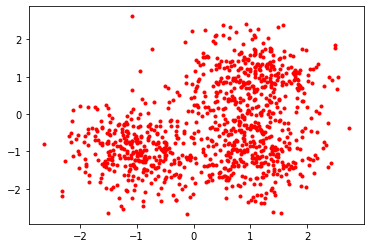

In [30]:
# #############################################################################
# Generate sample data
# define the data center
centers = [[1, 1], [-1, -1], [1, -1]]
# create the data around the center
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)
plt.plot(X[:, 0], X[:, 1], 'r' + '.')

## meanshift for clustering

In [19]:
X[:10]

array([[-0.65597862, -0.57374862],
       [ 0.19725809, -0.6372667 ],
       [-1.3707174 , -0.89413511],
       [ 0.9151388 ,  0.4603577 ],
       [ 1.21666042, -1.53500343],
       [ 2.07257963, -0.79154486],
       [ 1.58828598,  1.49136514],
       [-0.35904625, -0.41959772],
       [-1.77789793, -0.84695744],
       [ 1.14817223,  1.62876793]])

In [34]:

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
bandwidth =1

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
# labels
labels = ms.labels_
# centers
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)



number of estimated clusters : 3


## show the clustering result

In [33]:
bandwidth

1.0528749596726226

0
1
2


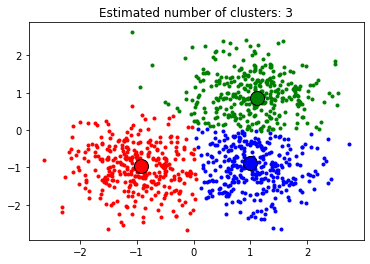

In [37]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    print(k)
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [36]:
k

2

# Segmentation with meanshift

## segmentation with sklearn meanshift

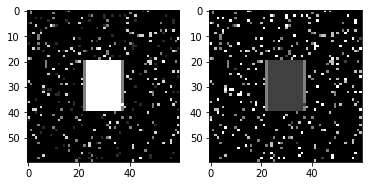

In [44]:
im= cv2.imread('bw.png',0)
# plt.imshow(im)
sz=(60,60)
im = cv2.resize(im, sz)
# plt.imshow(im)

# 2d->1d
imV= np.resize(im, (-1,1))
# imV.shape
# bandwidth = estimate_bandwidth(imV, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=5, bin_seeding=True)
ms.fit(imV)

# reshape the result to original size 1D->2D
lb = np.resize(ms.labels_, sz)

# display results
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(lb,cmap='gray')

## segmentation with pymeanshift

you can download the meanshift for image segmentation directly from https://github.com/fjean/pymeanshift

In [39]:
import pymeanshift as pms

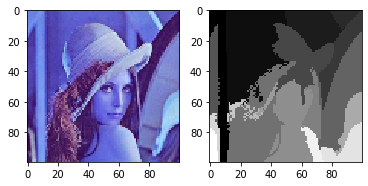

In [43]:
im = cv2.imread('lena.png')
sz=(100,100)
im = cv2.resize(im,sz)
# change color space from rgb -> lab
imLab = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
# segmentation in the LAB color space
(segmented_image, spM, number_regions) = pms.segment(imLab, 
                                                         spatial_radius=15, 
                                                         range_radius=15, 
                                                         min_density=50)
plt.subplot(121)
plt.imshow(im,  cmap='gray')
plt.subplot(122)
plt.imshow(spM, cmap='gray')

In [14]:

aa= np.load('D:\\program\\python\\Paper\\spAnormaly\\data\\result\\ucsd\\ped1frm0.02_2.npz', allow_pickle=True)

array([array([0.        , 0.        , 0.        , 0.        , 0.04716981,
       0.04716981, 0.04716981, 0.0754717 , 0.0754717 , 0.09433962,
       0.09433962, 0.10377358, 0.10377358, 0.14150943, 0.14150943,
       0.18867925, 0.18867925, 0.19811321, 0.19811321, 0.23584906,
       0.23584906, 0.26415094, 0.26415094, 0.29245283, 0.29245283,
       0.31132075, 0.33018868, 0.33018868, 0.3490566 , 0.37735849,
       0.41509434, 0.41509434, 0.45283019, 0.45283019, 0.47169811,
       0.47169811, 0.49056604, 0.49056604, 0.53773585, 0.53773585,
       0.59433962, 0.59433962, 0.68867925, 0.68867925, 0.81132075,
       1.        ]),
       array([0.        , 0.        , 0.        , 0.        , 0.01369863,
       0.02739726, 0.02739726, 0.04109589, 0.04109589, 0.05479452,
       0.05479452, 0.06849315, 0.06849315, 0.10958904, 0.10958904,
       0.12328767, 0.12328767, 0.15068493, 0.15068493, 0.35616438,
       0.35616438, 0.39726027, 0.39726027, 0.42465753, 0.42465753,
       0.45205479, 1.      

ValueError: Object arrays cannot be loaded when allow_pickle=False